In [1]:
from joblib import load

In [3]:
from os.path import expanduser

In [32]:
data, targets = load(expanduser('~/data/cogspaces/masked/data_archi.pt'))

In [5]:
data

array([[-0.0593075 , -0.00701725,  0.21193623, ..., -1.34039287,
        -1.30141022, -1.02167686],
       [-0.13109915, -0.2311984 ,  0.05309033, ..., -0.07826651,
         0.2834829 ,  0.60847671],
       [-0.84806974, -1.00103421, -0.87047836, ..., -0.12239447,
         0.39736599,  0.6137669 ],
       ...,
       [-0.14283896, -0.07247057, -0.09022375, ..., -0.1864129 ,
        -0.32984605, -0.43095671],
       [-0.0606973 ,  0.15150093,  0.24480913, ...,  0.87375386,
         0.92223574,  0.70986762],
       [ 0.17998054,  0.22266101, -0.11861543, ...,  0.49084818,
         0.75481206,  0.85794232]])

In [8]:
from cogspaces.datasets.dictionaries import fetch_atlas_modl
from cogspaces.datasets.utils import fetch_mask, get_output_dir, get_data_dir

from nilearn.input_data import NiftiMasker


In [42]:
modl_atlas = fetch_atlas_modl()
dictionary = modl_atlas['components512']
mask = fetch_mask()['hcp']
masker = NiftiMasker(mask_img=mask).fit()
dictionary = masker.transform(dictionary)

In [44]:
import numpy as np

In [45]:
gram = dictionary.dot(dictionary.T)
dict_rec = np.linalg.inv(gram).dot(dictionary)

In [51]:
data_red = data.dot(dictionary.T)

In [52]:
data_rec = data_red.dot(dict_rec)

In [10]:
img = masker.inverse_transform(data)

In [57]:
img_rec = masker.inverse_transform(data_rec)

In [11]:
img.to_filename('archi.nii.gz')

In [20]:
from nilearn._utils import check_niimg
from nilearn.plotting import plot_stat_map,find_xyz_cut_coords

In [14]:
denoised_img = check_niimg('denoised_archi.nii.gz')

In [67]:
denoised_data = masker.transform(denoised_img)

In [15]:
from nilearn.image import index_img

study            archi
subject             12
contrast    clicGvideo
Name: 312, dtype: object


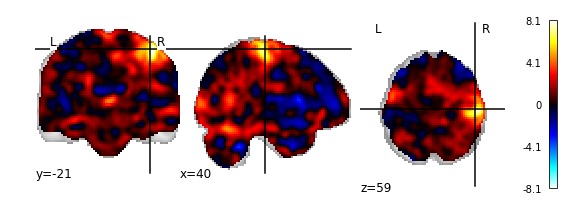

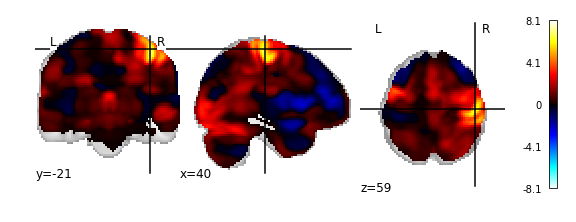

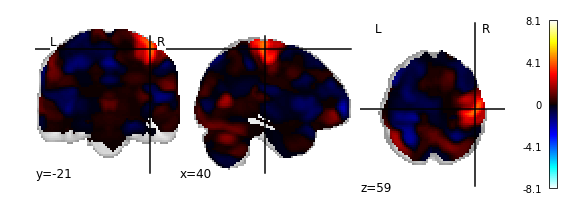

In [63]:
i = 312
vmax = index_img(img, i).get_data().max()
cut_coords = find_xyz_cut_coords(index_img(denoised_img, i), activation_threshold=vmax / 3)
plot_stat_map(index_img(img, i), cut_coords=cut_coords, threshold=0, vmax=vmax)
plot_stat_map(index_img(img_rec, i), cut_coords=cut_coords, threshold=0, vmax=vmax)
plot_stat_map(index_img(denoised_img, i), cut_coords=cut_coords, threshold=0, vmax=vmax)
print(targets.iloc[i])

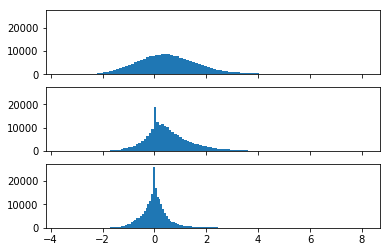

In [68]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
axes[0].hist(data[i], bins=100);
axes[1].hist(data_rec[i], bins=100);
axes[2].hist(denoised_data[i], bins=100);

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline